In [1]:
import tensorflow as tf
# TensorFlow library ko import karta hai machine learning models banane ke liye.
from tensorflow.keras import layers, models, callbacks, optimizers
# Keras se neural network ke components import karta hai.
import numpy as np
# Numerical computations ke liye NumPy library import karta hai.
import matplotlib.pyplot as plt
# Data visualization ke liye Matplotlib ka pyplot module import karta hai.
import os
# File system operations ke liye OS module import karta hai.
from tensorflow.keras.preprocessing import image
# Image preprocessing ke liye Keras ka image module import karta hai.

In [2]:
gpus = tf.config.list_physical_devices('GPU')
#System mein available GPU devices ki list retrieve karta hai.

In [3]:
gpus

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [4]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
# CIFAR-10 dataset ko training aur testing sets mein load karta hai.

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 14s 0us/step


In [5]:
x_train.shape, y_train.shape

((50000, 32, 32, 3), (50000, 1))

In [6]:
x_test.shape, y_test.shape

((10000, 32, 32, 3), (10000, 1))

In [7]:
x_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [8]:
import pandas as pd
# Pandas library ko import karta hai data frame banane ke liye.
# Flattening x_train for DataFrame
x_train_flattened = x_train.reshape(x_train.shape[0], -1)
# 4D array ko 2D array mein convert karta hai (50000, 3072).
df_x_train = pd.DataFrame(x_train_flattened)
 # Flattened x_train ko Pandas DataFrame mein convert karta hai.

In [9]:
x_train_flattened

array([[ 59,  62,  63, ..., 123,  92,  72],
       [154, 177, 187, ..., 143, 133, 144],
       [255, 255, 255, ...,  80,  86,  84],
       ...,
       [ 35, 178, 235, ...,  12,  31,  50],
       [189, 211, 240, ..., 195, 190, 171],
       [229, 229, 239, ..., 163, 163, 161]], dtype=uint8)

In [10]:
df_x_train

,0,1,2,3,4,5,6,7,8,9,...,3062,3063,3064,3065,3066,3067,3068,3069,3070,3071
0,59,62,63,43,46,45,50,48,43,68,...,104,216,184,140,151,118,84,123,92,72
1,154,177,187,126,137,136,105,104,95,102,...,136,143,133,139,143,134,142,143,133,144
2,255,255,255,253,253,253,253,253,253,253,...,79,78,85,83,79,85,83,80,86,84
3,28,25,10,37,34,19,38,35,20,42,...,38,54,47,28,63,56,37,72,65,46
4,170,180,198,168,178,196,177,185,203,183,...,78,75,79,82,71,75,78,73,77,80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,145,161,194,151,166,199,156,171,205,155,...,57,39,41,56,36,38,53,37,39,54
49996,255,245,132,254,247,134,255,249,137,254,...,82,249,174,79,252,181,81,253,181,76
49997,35,178,235,40,176,239,42,176,241,39,...,87,27,52,77,21,43,66,12,31,50
49998,189,211,240,186,208,236,185,207,235,184,...,165,195,184,169,196,189,171,195,190,171


In [11]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
# CIFAR-10 dataset ke labels ko class names se map karta hai.

In [13]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
# CIFAR-10 dataset ko load karta hai.
print(y_train[:10])
# Pehle 5 labels ko print karta hai (e.g., [[6], [9], [9], [4], [1]]).

[[6]
 [9]
 [9]
 [4]
 [1]
 [1]
 [2]
 [7]
 [8]
 [3]]


In [14]:
print([class_names[label[0]] for label in y_train[:5]])
 # Numerical labels ko class names mein convert karta hai.

['frog', 'truck', 'truck', 'deer', 'automobile']


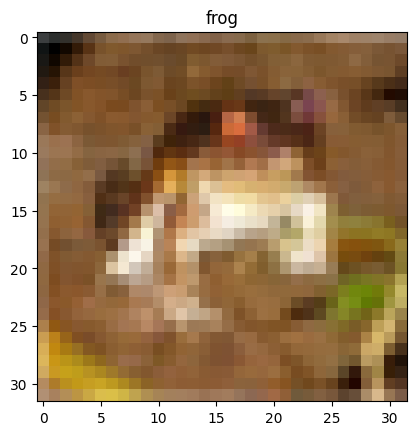

In [15]:
import matplotlib.pyplot as plt  # Visualization ke liye Matplotlib import karta hai.
plt.imshow(x_train[0])  # Pehli training image ko display karta hai.
plt.title(class_names[y_train[0][0]])  # Image ka label (class name) title ke roop mein dikhata hai.
plt.show()  # Plot ko display karta hai.

/tmp/ipython-input-2001157453.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(class_names[int(y_train[i])])  # Image ke label ko class_names se title ke roop mein dikhata hai.


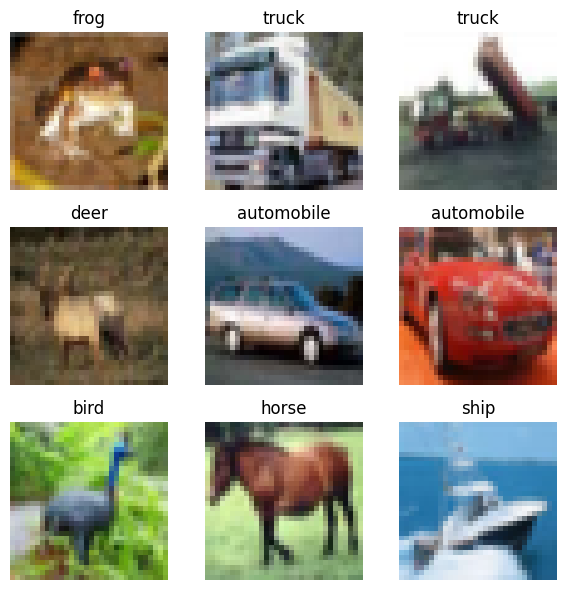

In [16]:
plt.figure(figsize=(6,6))  # 6x6 inch ka ek naya figure banata hai images display ke liye.
for i in range(9):  # 9 images ko loop ke zariye display karta hai.
    plt.subplot(3,3,i+1)  # 3x3 grid mein subplot banata hai, i+1 position pe.
    plt.imshow(x_train[i].astype('uint8'))  # x_train ki ith image ko uint8 format mein display karta hai.
    plt.title(class_names[int(y_train[i])])  # Image ke label ko class_names se title ke roop mein dikhata hai.
    plt.axis('off')  # Subplot ke axes ko hide karta hai.
plt.tight_layout()  # Subplots ke beech spacing ko adjust karta hai.
plt.show()  # Saare plots ko display karta hai.

In [17]:
x_train = x_train.astype('float32') / 255.0
# x_train ke pixel values ko float32 mein convert karta hai aur 0-1 range mein normalize karta hai.
x_test = x_test.astype('float32') / 255.0
# x_test ke pixel values ko float32 mein convert karta hai aur 0-1 range mein normalize karta hai.

In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Image data augmentation aur preprocessing ke liye ImageDataGenerator class ko import karta hai.

In [19]:
batch_size = 64  # Ek baar mein 64 images ke batches banata hai training ke liye.

In [20]:
train_datagen = ImageDataGenerator( # Training data ke liye augmentation rules set karta hai.
    rotation_range=15,          # Images ko -15 se +15 degrees tak randomly rotate karta hai.
    width_shift_range=0.1,      # Images ko horizontally 10% tak shift karta hai.
    height_shift_range=0.1,     # Images ko vertically 10% tak shift karta hai.
    horizontal_flip=True,       # Images ko randomly horizontally flip karta hai.
    fill_mode='reflect'         # Shift ya rotation ke baad empty pixels ko reflect mode se fill karta hai.
)

In [21]:
train_generator = train_datagen.flow(x_train, y_train, batch_size=batch_size, shuffle=True)
# Training data ko batches mein generate karta hai aur augmentation apply karta hai.

In [22]:
model = models.Sequential()
# Ek Sequential neural network model initialize karta hai jisme layers ek ke baad ek jode jaate hain.

In [23]:
#Ek explicit Input layer joden
# shape=(32,32,3) batata hai ki input data 32x32 pixels ka hai aur 3 color channels (RGB) hain
# Yeh layer model ke liye input shape define karta hai, jo pehli layer ke liye zaroori hai
model.add(layers.Input(shape=(32,32,3)))

In [24]:
#----Block 1-----
# Pehli Convolutional layer joden
# 32 filters, 3x3 kernel, padding='same' se output size input jaisa rahta hai
# kernel_initializer='he_normal' weights ko He Normal initialization se set karta hai, jo ReLU ke liye achha hai
model.add(layers.Conv2D(32, (3,3), padding='same', kernel_initializer='he_normal'))

# Activation layer joden
# ReLU activation non-linearity add karta hai, negative values ko zero karta hai
model.add(layers.Activation('relu'))

# BatchNormalization layer joden
# Har batch ke liye inputs ko normalize karta hai, training ko stable aur tezi deta hai
model.add(layers.BatchNormalization())

# Dusri Convolutional layer joden
# 32 filters, 3x3 kernel, padding='same' se output size wahi rahta hai
model.add(layers.Conv2D(32, (3,3), padding='same'))

# Dusri Activation layer joden
# ReLU activation phir se non-linearity ke liye
model.add(layers.Activation('relu'))

# MaxPooling layer joden
# 2x2 window mein maximum value lekar spatial size ko 32x32 se 16x16 karta hai
# Yeh computation kam karta hai aur overfitting se bachata hai
model.add(layers.MaxPooling2D((2,2)))  # spatial size 32->16

# Dropout layer joden
# Training ke dauran 25% inputs ko randomly zero karta hai, overfitting se bachane ke liye
model.add(layers.Dropout(0.25))

In [25]:
# --- Block 2 ---
# Pehli Convolutional layer joden
# 64 filters, 3x3 kernel, padding='same' se output size input jaisa (16x16) rahta hai
# Yeh layer aur complex features seekhta hai
model.add(layers.Conv2D(64, (3,3), padding='same'))

# Activation layer joden
# ReLU activation negative values ko zero karta hai, non-linearity add karta hai
model.add(layers.Activation('relu'))

# BatchNormalization layer joden
# Har batch ke inputs ko normalize karta hai, training ko stable aur tezi deta hai
model.add(layers.BatchNormalization())

# Dusri Convolutional layer joden
# 64 filters, 3x3 kernel, padding='same' se output size wahi (16x16) rahta hai
# Yeh layer aur gehre features seekhta hai
model.add(layers.Conv2D(64, (3,3), padding='same'))

# Dusri Activation layer joden
# ReLU activation phir se non-linearity ke liye
model.add(layers.Activation('relu'))

# MaxPooling layer joden
# 2x2 window mein maximum value lekar spatial size ko 16x16 se 8x8 karta hai
# Yeh computation kam karta hai aur overfitting se bachata hai
model.add(layers.MaxPooling2D((2,2)))  # spatial size 16->8

# Dropout layer joden
# Training ke dauran 25% inputs ko randomly zero karta hai, overfitting se bachane ke liye
model.add(layers.Dropout(0.25))

In [26]:
# --- Block 3 ---
# Pehli Convolutional layer joden
# 128 filters, 3x3 kernel, padding='same' se output size input jaisa (8x8) rahta hai
# Yeh layer aur bhi complex features seekhta hai
model.add(layers.Conv2D(128, (3,3), padding='same'))

# Activation layer joden
# ReLU activation negative values ko zero karta hai, non-linearity add karta hai
model.add(layers.Activation('relu'))

# BatchNormalization layer joden
# Har batch ke inputs ko normalize karta hai, training ko stable aur tezi deta hai
model.add(layers.BatchNormalization())

# MaxPooling layer joden
# 2x2 window mein maximum value lekar spatial size ko 8x8 se 4x4 karta hai
# Yeh computation kam karta hai aur overfitting se bachata hai
model.add(layers.MaxPooling2D((2,2)))  # spatial size 8->4

# Dropout layer joden
# Training ke dauran 25% inputs ko randomly zero karta hai, overfitting se bachane ke liye
model.add(layers.Dropout(0.25))

In [27]:
# --- Head ---
# Flatten layer joden
# Feature maps (4x4x128) ko 1D vector mein badalta hai, dense layers ke liye zaroori
model.add(layers.Flatten())  # feature maps -> vector

# Dense layer joden
# 256 units ke saath, high-level features ko combine karta hai
model.add(layers.Dense(256))

# Activation layer joden
# ReLU activation negative values ko zero karta hai, non-linearity add karta hai
model.add(layers.Activation('relu'))

# BatchNormalization layer joden
# Har batch ke inputs ko normalize karta hai, training ko stable aur tezi deta hai
model.add(layers.BatchNormalization())

# Dropout layer joden
# Training ke dauran 50% inputs ko randomly zero karta hai, overfitting se bachane ke liye
model.add(layers.Dropout(0.5))

# Output Dense layer joden
# 10 units (10 classes ke liye, jaise CIFAR-10), softmax activation probabilities deta hai
model.add(layers.Dense(10, activation='softmax'))

In [28]:
#Model ka summary dikhayen
# Har layer ka naam, output shape, aur trainable parameters ka vivran deta hai
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │             

 Total params: 668,458 (2.55 MB)

 Trainable params: 667,498 (2.55 MB)

 Non-trainable params: 960 (3.75 KB)

In [29]:
# Model ko compile karen
# optimizer=Adam(learning_rate=1e-3) model ke weights ko update karta hai, learning rate 0.001 hai
# loss='sparse_categorical_crossentropy' integer labels (0-9) ke liye classification loss calculate karta hai
# metrics=['accuracy'] training aur validation ke dauran model ki accuracy track karta hai
model.compile(
    optimizer=optimizers.Adam(learning_rate=1e-3),
    loss='sparse_categorical_crossentropy',   # labels integers 0..9
    metrics=['accuracy']
)

In [30]:
# Checkpoint path define karen jahan model save hoga
# "best_cifar10_model.keras" file mein sirf sabse achha model save hoga
checkpoint_path = "best_cifar10_model.keras"

# ModelCheckpoint callback banayen
# Yeh har epoch ke baad model save karta hai jab val_accuracy improve hoti hai
# monitor='val_accuracy' validation accuracy ko track karta hai
# save_best_only=True sirf sabse achha model save karta hai
# verbose=1 save hone par message dikhata hai
cb_checkpoint = callbacks.ModelCheckpoint(checkpoint_path, monitor='val_accuracy', save_best_only=True, verbose=1)

# EarlyStopping callback banayen
# Yeh training rok deta hai agar val_accuracy 8 epochs tak improve na ho
# monitor='val_accuracy' validation accuracy ko track karta hai
# patience=8 matlab 8 epochs tak wait karega improvement ke liye
# restore_best_weights=True sabse achhe weights ko restore karta hai
# verbose=1 rokne par message dikhata hai
cb_early = callbacks.EarlyStopping(monitor='val_accuracy', patience=8, restore_best_weights=True, verbose=1)

# ReduceLROnPlateau callback banayen
# Yeh learning rate kam karta hai agar val_loss 4 epochs tak improve na ho
# monitor='val_loss' validation loss ko track karta hai
# factor=0.5 learning rate ko 50% kam karta hai
# patience=4 matlab 4 epochs tak wait karega
# min_lr=1e-6 learning rate ko isse niche nahi jane deta
# verbose=1 learning rate change hone par message dikhata hai
cb_reduce = callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=4, min_lr=1e-6, verbose=1)

In [31]:
# Total epochs set karen
# epochs=30 matlab model 30 baar pure training data par train karega
epochs = 30

# Har epoch ke liye steps calculate karen
# x_train.shape[0] training samples ki sankhya hai, batch_size se divide karke steps_per_epoch milta hai
# Yeh batata hai ki ek epoch mein kitne batches process honge
steps_per_epoch = x_train.shape[0] // batch_size

# Model ko train karen
# train_generator batches mein training data deta hai, augmentation ke saath
# steps_per_epoch har epoch mein kitne batches process karta hai
# epochs=30 training ke maximum rounds set karta hai
# validation_data=(x_test, y_test) validation ke liye test data use karta hai
# callbacks=[cb_checkpoint, cb_early, cb_reduce] model saving, early stopping, aur learning rate ko control karte hain
history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=epochs,
    validation_data=(x_test, y_test),
    callbacks=[cb_checkpoint, cb_early, cb_reduce]
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
780/781 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.3274 - loss: 2.0674
Epoch 1: val_accuracy improved from -inf to 0.52240, saving model to best_cifar10_model.keras
781/781 ━━━━━━━━━━━━━━━━━━━━ 53s 54ms/step - accuracy: 0.3276 - loss: 2.0665 - val_accuracy: 0.5224 - val_loss: 1.3211 - learning_rate: 0.0010
Epoch 2/30
  1/781 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.5000 - loss: 1.4861

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()



Epoch 2: val_accuracy did not improve from 0.52240
781/781 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5000 - loss: 1.4861 - val_accuracy: 0.5202 - val_loss: 1.3206 - learning_rate: 0.0010
Epoch 3/30
781/781 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.5205 - loss: 1.3294
Epoch 3: val_accuracy improved from 0.52240 to 0.55630, saving model to best_cifar10_model.keras
781/781 ━━━━━━━━━━━━━━━━━━━━ 34s 44ms/step - accuracy: 0.5205 - loss: 1.3293 - val_accuracy: 0.5563 - val_loss: 1.2430 - learning_rate: 0.0010
Epoch 4/30
  1/781 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.5781 - loss: 1.1105
Epoch 4: val_accuracy improved from 0.55630 to 0.56300, saving model to best_cifar10_model.keras
781/781 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5781 - loss: 1.1105 - val_accuracy: 0.5630 - val_loss: 1.2208 - learning_rate: 0.0010
Epoch 5/30
780/781 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.6016 - loss: 1.1109
Epoch 5: val_accuracy improved from 0.56300 to 0.61360, saving mode

In [32]:
# Model ka test dataset par performance evaluate karen
# x_test aur y_test test data aur labels hain
# verbose=2 evaluation ke dauran har batch ka summary dikhata hai
# test_loss aur test_acc mein loss aur accuracy store hoti hai
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)

# Test loss print karen
# Yeh batata hai ki test data par model ka average loss kitna hai
print("Test loss:", test_loss)

# Test accuracy print karen
# Yeh batata hai ki test data par model kitne percent predictions sahi karta hai
print("Test accuracy:", test_acc)

313/313 - 1s - 3ms/step - accuracy: 0.8145 - loss: 0.5491
Test loss: 0.5490552186965942
Test accuracy: 0.8144999742507935


In [34]:
# TensorFlow se zaroori module import karen
import tensorflow as tf

# Save kiya hua model load karen
# "cifar10_cnn_full.keras" file se model ki architecture, weights, aur optimizer state load hota hai
loaded_model = tf.keras.models.load_model("best_cifar10_model.keras")

# Confirmation message aur model summary print karen
# Yeh batata hai ki model load ho gaya aur uski architecture details dikhata hai
print("Loaded model summary:")
loaded_model.summary()

Loaded model summary:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │             

 Total params: 2,003,456 (7.64 MB)

 Trainable params: 667,498 (2.55 MB)

 Non-trainable params: 960 (3.75 KB)

 Optimizer params: 1,334,998 (5.09 MB)